In [2]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
import functions as fct

#Gives us nice LaTeX fonts in the plots
import matplotlib as mpl
from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
mpl.rcParams['axes.unicode_minus'] = False

# Load variables

Needed variables:
- B0_M and BDT
- B0_ENDVERTEX_X, B0_ENDVERTEX_Y, B0_ENDVERTEX_Z
- tau_ENDVERTEX_X, tau_ENDVERTEX_Y, tau_ENDVERTEX_Z
- tau_ENDVERTEX_XERR, tau_ENDVERTEX_YERR, tau_ENDVERTEX_ZERR

In [3]:
variables = []

for particle in 'B0', 'Dst', 'D0','tau':
    variables.append(f"{particle}_M")



In [4]:
df    = fct.load_data(years,magnets,type_data = 'common',vars = variables, cut_DeltaM=False, cut_PIDK=None)
df_MC = fct.load_data(years,magnets,type_data = 'MC'    ,vars = variables, cut_DeltaM=False, cut_PIDK=None)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root


In [5]:
df["Delta_M"] = df["Dst_M"] - df["D0_M"]
df_MC["Delta_M"] = df_MC["Dst_M"] - df_MC["D0_M"]

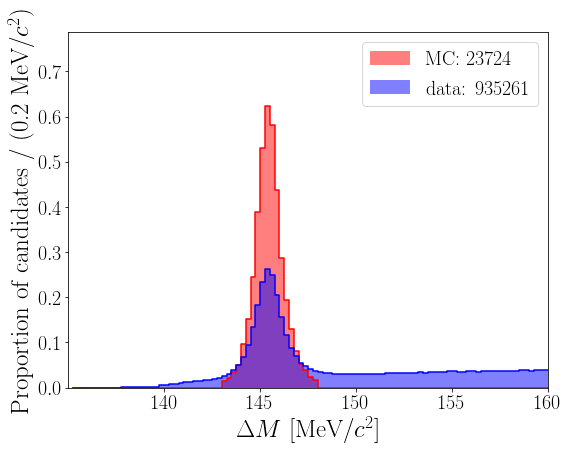

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Delta_M_MC_data.pdf


In [13]:
fct.plot_hist({'MC':df_MC, 'data':df},'Delta_M', '$\Delta M$', 'MeV/$c^2$',
              n_bins = 100, mode_hist = True)